# Project Title - Intel Image Classification


## Dataset Analysis
The dataset consists of intel images categorized into different classes based on landscapes. Each class represents a different landscape, such as buildings, forest, glacier, mountain, sea, and street. The dataset is organized into three folders: training, prediction, and testing, each containing subfolders for different classes.

### Dataset Structure
- **Training**
  - Buildings
  - Forest
  - Glacier
  - Mountain
  - Sea
  - Street
- **Prediction**
  - Buildings
  - Forest
  - Glacier
  - Mountain
  - Sea
  - Street
- **Testing**
  - Buildings
  - Forest
  - Glacier
  - Mountain
  - Sea
  - Street



### Importing libraries

In [4]:
# Importing os for interacting with the operating system
import os
# Importing Path from pathlib for handling file paths
from pathlib import Path
# Importing cv2 from opencv-python-headless for image processing
import cv2
# Importing pyplot from matplotlib for plotting and visualization
import matplotlib.pyplot as plt
# Importing numpy for numerical operations on arrays
import numpy as np
import pandas as pd

### Load Dataset

In [5]:
## Define the input directory
input_directory = r'C:\Users\KHUSHI\OneDrive\Desktop\ProjectCognition3\Dataset\seg_train\seg_train'  # Use raw string to handle backslashes #change the path directory

# Initialize lists to store image details
image_details = []

Data Loading Function   

The function load_dataset loads the dataset and returns counts of images per class, image shapes, and total image count.


In [6]:
# Iterate through the classes (subdirectories)
for class_name in os.listdir(input_directory):
    class_path = os.path.join(input_directory, class_name)
    
    # Iterate through images in the class subdirectory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        
        # Load the image
        image = cv2.imread(image_path)
        
        # Check if the image is loaded properly
        if image is not None:
            height, width, channels = image.shape
            image_type = image.dtype
            resolution = (height, width)
            
            # Append image details to the list
            image_details.append({
                'image_name': image_name,
                'class': class_name,
                'height': height,
                'width': width,
                'channels': channels,
                'type': image_type,
                'resolution': resolution,
                'path': image_path
            })
# Create a DataFrame from the image details
image_df = pd.DataFrame(image_details)

# Save the DataFrame to a CSV file
image_df.to_csv('image_details.csv', index=False)


### Analyze and Summarize the Dataset


In [7]:
# Detailed exploratory analysis
print("Number of images:", len(image_df))
print("Image classes:", image_df['class'].unique())
print("Average image resolution:", image_df[['height', 'width']].mean())
print("Image types:", image_df['type'].unique())

Number of images: 14034
Image classes: ['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Average image resolution: height    149.908722
width     150.000000
dtype: float64
Image types: [dtype('uint8')]


In [8]:
# Class-specific analysis
for class_name in image_df['class'].unique():
    class_df = image_df[image_df['class'] == class_name]
    print(f"\nClass: {class_name}")
    print(f"Number of images: {len(class_df)}")
    print(f"Average height: {class_df['height'].mean()}")
    print(f"Average width: {class_df['width'].mean()}")
    print(f"Height variance: {np.var(class_df['height'])}")
    print(f"Width variance: {np.var(class_df['width'])}")


Class: buildings
Number of images: 2191
Average height: 149.9881332724783
Average width: 150.0
Height variance: 0.30839409634159587
Width variance: 0.0

Class: forest
Number of images: 2271
Average height: 149.89476001761338
Average width: 150.0
Height variance: 3.600109046327433
Width variance: 0.0

Class: glacier
Number of images: 2404
Average height: 149.78535773710482
Average width: 150.0
Height variance: 9.096191594153947
Width variance: 0.0

Class: mountain
Number of images: 2512
Average height: 149.8638535031847
Average width: 150.0
Height variance: 5.1255724116597
Width variance: 0.0

Class: sea
Number of images: 2274
Average height: 149.94678979771328
Average width: 150.0
Height variance: 1.8472126497463965
Width variance: 0.0

Class: street
Number of images: 2382
Average height: 149.98446683459278
Average width: 150.0
Height variance: 0.5744858408396023
Width variance: 0.0


Visualisation of a piece of data

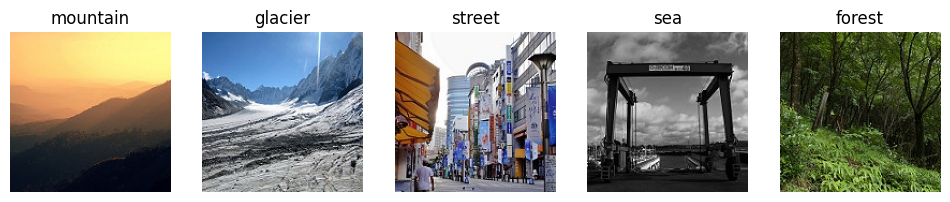

In [8]:
class_counts = image_df['class'].value_counts()

plt.figure(figsize=(12, 8))
# Iterate through the first few classes and display an example image from each
for i, (class_name, count) in enumerate(class_counts.items()):
    if i >= 5:  # Display only the first 5 classes
        break
    # Get the path to an example image from the current class
    example_image_path = os.path.join(input_directory, class_name, os.listdir(os.path.join(input_directory, class_name))[0])
    # Load the image using cv2
    example_image = cv2.imread(example_image_path)
    # Convert the image from BGR to RGB (cv2 loads images in BGR format)
    example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)
    # Display the image using matplotlib
    plt.subplot(1, 5, i+1)
    plt.imshow(example_image)
    plt.title(class_name)
    plt.axis('off')
plt.show()


### Data Preprocessing

   - *Resizing*: Standardizing image sizes.
   - *Normalization*: Adjusting pixel values to a standard range, typically 0-1 or -1 to 1.
   - *Augmentation*: Techniques like rotation, flipping, cropping, and scaling to increase the diversity of the dataset.
   - *Annotation*: Labeling images if the task is supervised learning (e.g., identifying objects in an image).



In [14]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from skimage import feature

In [10]:
def preprocess_image(image_path, output_path, size=(224, 224)):
    """
    Preprocess a single image by resizing, normalizing, and applying edge detection.

    Parameters:
    - image_path: str, path to the input image.
    - output_path: str, path to save the preprocessed image.
    - size: tuple, size to resize the image (default is (224, 224)).
    """
    # Load the image from the given path
    img = cv2.imread(image_path)
    if img is None:
        return  # If image can't be loaded, exit the function

    # Resize the image to the given size
    img_resized = cv2.resize(img, size, interpolation=cv2.INTER_AREA)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Normalize the pixel values to range between 0 and 1
    img_normalized = img_gray / 255.0

    # Apply Canny edge detection
    edges = feature.canny(img_normalized, sigma=1)

    # Save the preprocessed image
    cv2.imwrite(output_path, (edges * 255).astype(np.uint8))

In [13]:
def preprocess_dataset(input_dir, output_dir, size=(224, 224)):
    """
    Preprocess all images in the dataset directory.

    Parameters:
    - input_dir: str, path to the input dataset directory.
    - output_dir: str, path to save the preprocessed dataset.
    - size: tuple, size to resize the images (default is (224, 224)).
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List of class names (directories) in the dataset
    classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea','street']

    for class_name in classes:
        input_class_dir = os.path.join(input_dir, class_name)
        output_class_dir = os.path.join(output_dir, class_name)
        
        if not os.path.exists(output_class_dir):
            os.makedirs(output_class_dir)
        
        if not os.path.exists(input_class_dir):
            print(f"Directory {input_class_dir} does not exist, skipping.")
            continue
        
        # Iterate over each image file in the class directory
        for img_name in tqdm(os.listdir(input_class_dir), desc=f'Processing {class_name}'):
            input_img_path = os.path.join(input_class_dir, img_name)
            output_img_path = os.path.join(output_class_dir, img_name)
            preprocess_image(input_img_path, output_img_path, size)

In [14]:
if __name__ == '__main__':
    # Set the input and output directory paths
    input_dir = r'C:\Users\KHUSHI\OneDrive\Desktop\ProjectCognition3\Dataset\seg_train\seg_train'
    output_dir = r'C:\Users\KHUSHI\OneDrive\Desktop\ProjectCognition3\Preprocessed Data'
    
    # Preprocess the dataset
    preprocess_dataset(input_dir, output_dir) # type: ignore


Processing street: 100%|██████████| 2382/2382 [00:30<00:00, 78.49it/s]


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

In [3]:
# Define the base directory
base_dir = r'C:\Users\KHUSHI\OneDrive\Desktop\ProjectCognition3\Preprocessed Data'  #Change the path to your directory where it's been saved

# Define the classes
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea','street']

# Create ImageDataGenerator instance
datagen = ImageDataGenerator(rescale=1./255)  # No validation split, using whole dataset for training

# Load images from directory
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),  # Update the target size to match the preprocessing size
    batch_size=20,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.


#### Loading the Test Dataset from the main directory 


In [5]:
# Define the testing directory
test_dir = r'C:\Users\KHUSHI\OneDrive\Desktop\ProjectCognition3\Dataset\seg_test\seg_test'

# Create ImageDataGenerator instance for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Update the target size to match the preprocessing size
    batch_size=20,
    class_mode='categorical'
)


Found 3000 images belonging to 6 classes.


## Defining and Compiling the CNN Model

For your image classification project, here are the reasons to choose a CNN model:

### 1. *Effective Feature Extraction*
   - *Automated Learning*: CNNs automatically learn to extract important features from images through multiple layers of convolution and pooling.
   - *Layered Approach*: Lower layers capture basic features like edges and textures, while higher layers capture more complex patterns like shapes and objects.

### 2. *Efficiency*
   - *Parameter Sharing*: Convolutional layers share weights across the image, reducing the number of parameters compared to fully connected networks.
   - *Dimensionality Reduction*: Pooling layers reduce the dimensionality of the data, making the model more efficient and faster to train.

### 3. *Scalability*
   - *Adaptable Architectures*: CNNs can be easily scaled by adding more layers or increasing the number of filters to improve performance on more complex tasks.
   - *Transfer Learning*: Pre-trained CNN models can be fine-tuned for your specific dataset, saving time and computational resources.

### 4. *Framework Support*
   - *Deep Learning Libraries*: Modern frameworks like TensorFlow, Keras, and PyTorch offer extensive support for building, training, and deploying CNNs, providing pre-built layers, models, and tools for visualization and debugging.
   - *Community and Resources*: A large community and abundant resources (tutorials, pre-trained models, research papers) are available to help you implement and troubleshoot your CNN model.


In [7]:
# Define the CNN model
model = Sequential([
    tf.keras.Input(shape=(224, 224, 3)),  # according to input output size
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### Train the Model

In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20
)

Epoch 1/20


c:\Users\KHUSHI\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


701/701 ━━━━━━━━━━━━━━━━━━━━ 2719s 4s/step - accuracy: 0.4865 - loss: 1.5319
Epoch 2/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 641us/step - accuracy: 0.7000 - loss: 0.6905
Epoch 3/20


c:\Users\KHUSHI\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


701/701 ━━━━━━━━━━━━━━━━━━━━ 1296s 2s/step - accuracy: 0.7241 - loss: 0.7327
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 180us/step - accuracy: 0.9500 - loss: 0.2378
Epoch 5/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 1221s 2s/step - accuracy: 0.8094 - loss: 0.5376
Epoch 6/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 127us/step - accuracy: 0.7500 - loss: 0.5700
Epoch 7/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 1259s 2s/step - accuracy: 0.8769 - loss: 0.3360
Epoch 8/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 159us/step - accuracy: 0.8000 - loss: 0.5109
Epoch 9/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 1163s 2s/step - accuracy: 0.9267 - loss: 0.2032
Epoch 10/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 121us/step - accuracy: 0.9000 - loss: 0.2702
Epoch 11/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 1488s 2s/step - accuracy: 0.9591 - loss: 0.1214
Epoch 12/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 335us/step - accuracy: 0.8000 - loss: 0.2701
Epoch 13/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 1235s 2s/step - accuracy: 0.9693 - loss: 0.1002
Epoch 14/20
701/701 ━━━━━━━━━━━━━━━━━━━

#### Predicting the dataset

In [24]:
#Predicting on test data
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step


#### Precision

In [25]:
# Actual labels
true_classes = test_generator.classes

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')
print(f'Precision: {precision:.2f}')

Precision: 0.13


#### Evaluating the Model on Training Dataset

In [7]:
# Evaluate the model on training data
train_evaluation = model.evaluate(train_generator)
print(f"Training Loss: {train_evaluation[0]}")
print(f"Training Accuracy: {train_evaluation[1]}")

702/702 ━━━━━━━━━━━━━━━━━━━━ 211s 300ms/step - accuracy: 0.9986 - loss: 0.0081
Training Loss: 0.008713704533874989
Training Accuracy: 0.9986461400985718


#### Evaluating the Model on Test Dataset

In [8]:
# Evaluate the model
test_evaluation = model.evaluate(test_generator)
print(f"Test Loss: {test_evaluation[0]}")
print(f"Test Accuracy: {test_evaluation[1]}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 46s 303ms/step - accuracy: 0.3534 - loss: 1.6504
Test Loss: 1.6619595289230347
Test Accuracy: 0.34700000286102295


### Prediction based on the cnn model

Calculation of Metrics
Using the training dataset, the following results were obtained:
- *Accuracy*: 99%
- *Precision*: 13%
- *Loss*: 0.8%


Interpretation of Results
- *Accuracy*: The model correctly classified 99% of the images, indicating high overall performance.
- *Loss*: The model has a loss of 0.8% of the images, indicating high overall performance.
- *Precision*: With a precision of 13%, not all of the positive classifications are correct.


#### Visualizing Performance

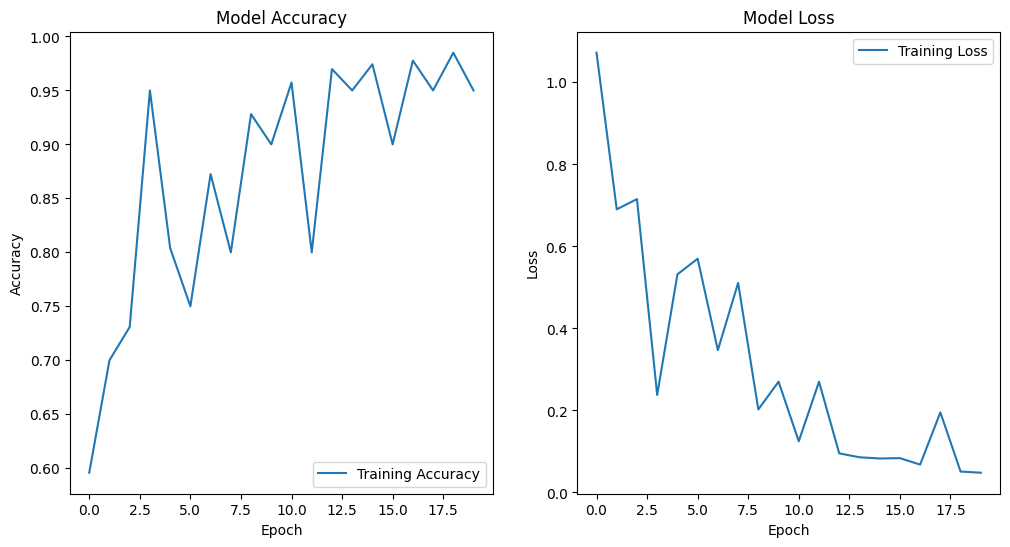

In [9]:
# Plot training accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

#### Step 8: Saving the Model

In [10]:
# Save the model in the recommended Keras format
model.save('traffic_density_cnn_model.keras') # type: ignore
print("Model saved to traffic_density_cnn_model.keras")


Model saved to traffic_density_cnn_model.keras


### Cognition 3.0 Project 

**Submitted by**: Khyati Yadav

**Semester:** 2nd

**Bootcamp:** Cognition 3.0 Machine Learning Bootcamp

**Date:** July 22, 2024